In [1]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

sys.path.append('/Applications/OpenFUSIONToolkit/python')
from OpenFUSIONToolkit.TokaMaker import TokaMaker, load_gs_mesh, gs_Domain, read_eqdsk

from omfit_classes.omfit_eqdsk import boundaryShape

In [2]:
def resize_polygon(points, dx):
    new_points = np.empty(np.shape(points))
    for i in range(np.shape(points)[0]):
        if i==0:
            last = points[-1,:]
            next = points[i+1,:]
        elif i == np.shape(points)[0]-1:
            last = points[i-1,:]
            next = points[0,:]
        else:
            next = points[i+1,:]
            last = points[i-1,:]
        par = points[i,:]-last
        par/= np.linalg.norm(par)
        perp = np.array([par[1], -par[0]])
        temp = points[i,:] + perp*dx
        par_2 = next-points[i,:]
        par_2/= np.linalg.norm(par_2)
        perp_2 = [par_2[1], -par_2[0]]
        new_points[i, :] = temp + dx/np.dot(perp_2,par)*par  + par*dx/np.dot(par_2,perp)*np.dot(par_2,par)
    return new_points

In [3]:
def corners(r,z,dr,dz):
    rs = np.array([r+dr/2, r+dr/2, r-dr/2, r-dr/2, r+dr/2])
    zs = np.array([z+dz/2, z-dz/2, z-dz/2, z+dz/2, z+dz/2])
    return np.column_stack((rs,zs))

In [4]:
def closest(plasma, lim):
    min = 1E10
    point = [0,0]
    for i in range(np.size(lim[:,0])):
        distances = np.sqrt((plasma[:,0]-lim[i,0])**2 +(plasma[:,1]-lim[i,1])**2 )
        if np.min(distances)<min:
            min = np.min(distances)
            point = plasma[np.argmin(distances),:]
    return point, min*100

[ 0.59965371 -0.06290857]
[ 0.62468996 -0.13367297]
[ 0.62468996 -0.14388837]
[ 0.62468996 -0.15388516]
[ 0.66534663 -0.23941227]
[ 0.59915643 -0.05868083]
[ 0.62271996 -0.12553256]
[ 0.62271996 -0.13607148]
[ 0.62271996 -0.14622985]
[ 0.66098506 -0.22947016]
[ 0.59865915 -0.05184082]
[ 0.62074997 -0.11880132]
[ 0.62074997 -0.12913603]
[ 0.62074997 -0.13967411]
[ 0.62074997 -0.14991029]
[0.59816188 0.04107776]
[0.59816188 0.05018684]
[0.61877997 0.12067377]
[ 0.61877997 -0.13365149]
[ 0.61877997 -0.1443285 ]
[0.5912 0.    ]
[ 0.5976646  -0.04235421]
[ 0.5976646  -0.05123638]
[ 0.61680997 -0.12412104]
[0.92764 0.49172]


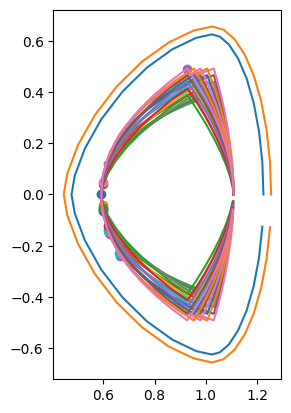

In [5]:
r,z,zeff= boundaryShape(kapu = 1.62, kapl = 1.62, delu = -0.43, dell = -0.43, zetail = -.22, zetaiu = -.22, zetaou = 0, zetaol = 0, a = 0.405, eps = 0.405/0.85, zoffset = 0, upnull = False, lonull = False, npts = 8)
vv_outer = np.column_stack((r,z))
vv_inner = resize_polygon(vv_outer, -0.03)
plt.plot(vv_inner[:,0], vv_inner[:,1])
plt.plot(vv_outer[:,0], vv_outer[:,1])
plt.gca().set_aspect(aspect =1 )
ds = np.linspace(-0.7, -.3, 5)
es = np.linspace(1.5, 1.9, 5)
dist = []

for d in ds:
    for e in es:
        r, z, zeff = boundaryShape(kapu = e, kapl = e, delu = d, dell = d, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588, eps = 0.2588/0.85, zoffset = 0, upnull = True, lonull = True, npts = 8)
        boundary = np.column_stack((r,z))
        point, distance = closest(boundary,vv_inner)
        dist.append(distance)
        plt.scatter(point[0], point[1])
        print(point)
        plt.plot(boundary[:,0], boundary[:,1])


[10.660913778928299, 10.27742359659531, 9.757758852995524, 8.888741225909085, 8.135267844757397, 10.8379095259679, 10.39228348061584, 10.013867330539679, 9.159086468327915, 8.262133707556538, 11.173818067482955, 10.506475093467074, 10.069817346209192, 9.444292417508656, 8.211203505860114, 11.33281972318523, 11.04784256619684, 10.245448048397725, 9.721914974251385, 8.052603203826004, 11.46687112000872, 11.254567221681908, 10.678568068220343, 8.721128774704418, 7.033108837345711]


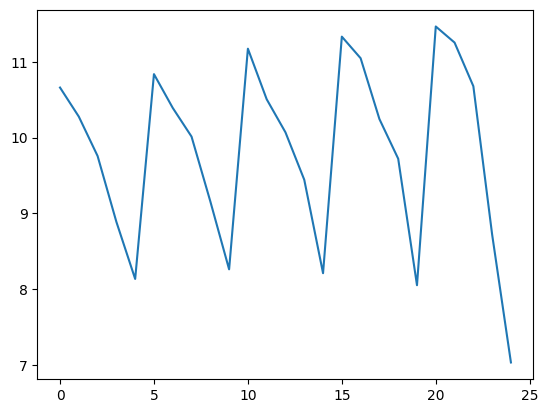

In [5]:
plt.plot(dist)
print(dist)

In [5]:
r,z,zeff= boundaryShape(kapu = 1.55, kapl = 1.55, delu = -0.4, dell = -0.4, zetail = -.03, zetaiu = -.03, zetaou = -.03, zetaol = -.03, a = 0.413, eps = 0.413/0.85, zoffset = 0, upnull = False, lonull = False, npts = 8)
lim1 = np.column_stack((r,z))
vv1 = resize_polygon(lim1, 0.03)

lim2 = resize_polygon(lim1, -0.05)
vv2 = resize_polygon(lim2, 0.03)

lim3 = resize_polygon(lim1, -0.1)
vv3 = resize_polygon(lim3, 0.03)

In [6]:
coils = {
    'CS0': {'rc': 0.375, 'zc': -.54, 'w': 0.05, 'h': 0.35},
    'CS1': {'rc': 0.375, 'zc': 0, 'w': 0.05, 'h': 0.7},
    'CS2': {'rc': 0.375, 'zc': .54, 'w': 0.05, 'h': 0.35},

    'EF0U': {'rc': .588, 'zc': 0.53, 'w': 0.15, 'h': 0.15},
    'EF1U': {'rc': 1.1, 'zc': 0.765, 'w': 0.15, 'h': 0.15},
    'EF2U': {'rc': 1.25, 'zc': 0.625, 'w': 0.15, 'h': 0.15},
    'EF3U': {'rc': 1.7, 'zc': 0.4, 'w': .15, 'h': .15},

    'EF0L': {'rc': .588, 'zc': -0.53, 'w': 0.15, 'h': 0.15},
    'EF1L': {'rc': 1.1, 'zc': -0.765, 'w': 0.15, 'h': 0.15},
    'EF2L': {'rc': 1.25, 'zc': -0.625, 'w': 0.15, 'h': 0.15},
    'EF3L': {'rc': 1.7, 'zc': -0.4, 'w': .15, 'h': .15},
  
}

In [7]:
## Define mesh resolution in each region
plasma_resolution = 0.02
coil_resolution = 0.04
vv_resolution = 0.03
vac_resolution = 0.075

In [10]:
# Create a G-S domain
gs_mesh = gs_Domain()
# Define region information for mesh
gs_mesh.define_region('air',vac_resolution,'boundary')
gs_mesh.define_region('plasma',plasma_resolution,'plasma')
gs_mesh.define_region('vv',vv_resolution,'conductor',eta=1e-6)
# Define each of the coils
for key, coil in coils.items():
    gs_mesh.define_region(key,coil_resolution,'coil')

In [11]:
# Define vaccum vessel geometry
gs_mesh.add_annulus(lim3,'plasma',vv3,'vv',parent_name='air')
# Define the shape of the coils
for key, coil in coils.items():
    gs_mesh.add_rectangle(coil['rc'],coil['zc'],coil['w'],coil['h'],key,parent_name='air')

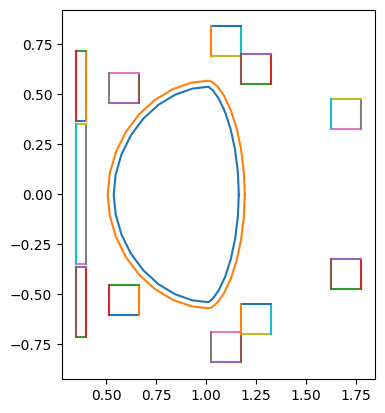

In [12]:
## Plot geometry
fig, ax = plt.subplots(1,1)
for region in gs_mesh.regions:
    region.plot_segments(fig,ax)
ax.set_aspect('equal','box')

In [13]:
#Create mesh
mesh_pts, mesh_lc, mesh_reg = gs_mesh.build_mesh()
coil_dict = gs_mesh.get_coils()
cond_dict = gs_mesh.get_conductors()

Assembling regions:
  # of unique points    = 509
  # of unique segments  = 50
Generating mesh:
  # of points  = 3455
  # of cells   = 6800
  # of regions = 14


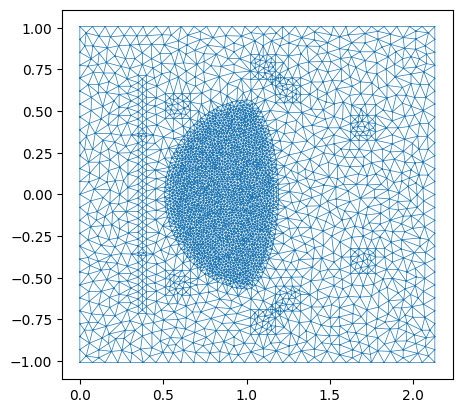

In [14]:
# Plot mesh
fig, ax = plt.subplots()
plt.gca().set_aspect(aspect = 1)
ax.triplot(mesh_pts[:,0],mesh_pts[:,1], lw = 0.5)

In [13]:
mygs = TokaMaker()
mygs.setup_mesh(mesh_pts, mesh_lc, mesh_reg)
mygs.setup_regions(cond_dict=cond_dict)
mygs.setup(order = 2, F0 =0.8*3) ## F0 = R0 * B0

#----------------------------------------------
OpenFUSIONToolkit Initialized
Development branch:   main
Revision id:          11ca7a7
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  4.294E+00
    # of points  =    4071
    # of edges   =   12102
    # of cells   =    8032
    # of boundary points =     108
    # of boundary edges  =     108
    # of boundary cells  =     108
  Resolution statistics:
    hmin =  1.000E-02
    hrms =  3.717E-02
    hmax =  1.128

In [14]:
coil_reg_mat = np.zeros((mygs.ncoils+1,mygs.ncoils+1), dtype=np.float64)
targets = np.zeros(mygs.ncoils+1)
coil_weights = 0.5*np.ones(mygs.ncoils+1)

#Set target values for CS coils
coil_reg_mat[0,0] = 1
coil_reg_mat[1,1] = 1
coil_reg_mat[2,2] = 1
targets[0] = -5E5
targets[1] = -5E5 
targets[2] = -5E5

#Enforce up/down symmetry in PF coils
coil_reg_mat[3,3] = 1
coil_reg_mat[3,7] = -1
coil_reg_mat[4,4] = 1
coil_reg_mat[4,8] = -1
coil_reg_mat[5,5] = 1
coil_reg_mat[5,9] = -1
coil_reg_mat[6,6] = 1
coil_reg_mat[6,10] = -1

mygs.set_coil_reg(coil_reg_mat, targets, coil_weights)

#Set upper bound on coil currents
coil_bounds = np.zeros((mygs.ncoils+1,2), dtype=np.float64)
coil_bounds[:,0] = -1.E11; coil_bounds[:,1] = 1.E11
mygs.set_coil_bounds(coil_bounds)


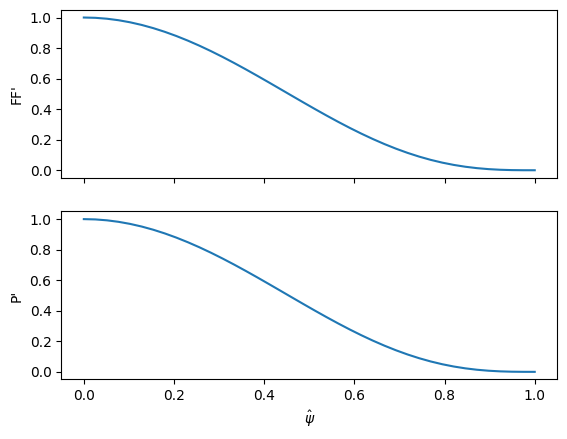

In [15]:
# Define shape of P' anf FF' profiles

n_sample = 40
psi_sample = np.linspace(0.0,1.0,n_sample)

# Set F*F' profile
alpha = 2
gamma = 3
ffp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
ffp_prof['y'] /= ffp_prof['y'][0] # Normalize profile (not required but convienient)

# Set P' profile
alpha = 2
gamma = 3
pp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
pp_prof['y'] /= pp_prof['y'][0] # Normalize profile (not required but convienient)

fig, ax = plt.subplots(2,1,sharex=True)
# Plot F*F'
ax[0].plot(ffp_prof['x'],ffp_prof['y'])
ax[0].set_ylabel("FF'")
# Plot P'
ax[1].plot(pp_prof['x'],pp_prof['y'])
ax[1].set_ylabel("P'")
_ = ax[-1].set_xlabel(r"$\hat{\psi}$")

mygs.set_profiles(ffp_prof=ffp_prof,pp_prof=pp_prof)

In [16]:
#Define global quantities
Ip_target = 1E6
mygs.set_targets(Ip = Ip_target, Ip_ratio=1) #Can change poloidal beta by modifying Ip_ratio target

In [17]:
kappa = 1.5
delta = -0.5

from OpenFUSIONToolkit.TokaMaker import create_isoflux
boundary = create_isoflux(4,0.85,0.0,0.2588,1.7,-0.5)
x_points = np.zeros((2,2))
x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]

x_weights = 5*np.ones(2)
mygs.set_saddles(x_points, x_weights)

mygs.set_isoflux(boundary, 10.0*np.ones(4))

In [18]:
##Set shape targets
kappa = 1.5
delta = -0.5

r, z, zeff = boundaryShape(kapu = kappa, kapl = kappa, delu = delta, dell = delta, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588, eps = 0.2588/0.85, zoffset = 0, upnull = True, lonull = True, npts = 8)
boundary = np.column_stack((r,z))
isoflux_weights = 10*np.ones(32)
mygs.set_isoflux(boundary, isoflux_weights)

#Set saddle targets
x_points = np.zeros((2,2))
x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]

x_weights = 5*np.ones(2)
mygs.set_saddles(x_points, x_weights)



In [19]:
mygs.init_psi(0.8,0,0.22, kappa,delta) #Initial "guess"
mygs.settings.maxits = 100
mygs.update_settings()
mygs.solve()

Starting non-linear GS solver
     1  1.2181E+01  7.7264E+00  3.2521E-02  8.9846E-01 -3.9834E-05 -0.0000E+00
     2  1.2838E+01  8.1914E+00  1.2836E-02  8.9830E-01 -3.2306E-05 -0.0000E+00
     3  1.3012E+01  8.3289E+00  4.2611E-03  8.9788E-01 -2.6445E-05 -0.0000E+00
     4  1.3082E+01  8.3898E+00  1.4882E-03  8.9749E-01 -2.2353E-05 -0.0000E+00
     5  1.3112E+01  8.4184E+00  5.6061E-04  8.9720E-01 -1.9952E-05 -0.0000E+00
     6  1.3124E+01  8.4319E+00  2.3362E-04  8.9700E-01 -1.8452E-05 -0.0000E+00
     7  1.3128E+01  8.4383E+00  1.1255E-04  8.9687E-01 -1.7506E-05 -0.0000E+00
     8  1.3130E+01  8.4412E+00  6.2984E-05  8.9679E-01 -1.6888E-05 -0.0000E+00
     9  1.3130E+01  8.4425E+00  3.8560E-05  8.9674E-01 -1.6481E-05 -0.0000E+00
    10  1.3129E+01  8.4430E+00  2.4342E-05  8.9671E-01 -1.6209E-05 -0.0000E+00
    11  1.3129E+01  8.4432E+00  1.5399E-05  8.9669E-01 -1.6024E-05 -0.0000E+00
    12  1.3129E+01  8.4433E+00  9.6713E-06  8.9668E-01 -1.5896E-05 -0.0000E+00
    13  1.3128E+01  8.

0

[ 0.97862379 -0.38860569]
[0.9786145  0.38859937]
bye
Equilibrium Statistics:
  Topology                =   Diverted
  Toroidal Current [A]    =    1.0000E+06
  Current Centroid [m]    =    0.886  0.000
  Magnetic Axis [m]       =    0.897 -0.000
  Elongation              =    1.452 (U:  1.507, L:  1.398)
  Triangularity           =   -0.463 (U: -0.496, L: -0.429)
  Plasma Volume [m^3]     =    1.466
  q_0, q_95               =    0.441  1.538
  Peak Pressure [Pa]      =    5.0837E+05
  Stored Energy [J]       =    2.0211E+05
  <Beta_pol> [%]          =   52.7237
  <Beta_tor> [%]          =    3.1464
  Diamagnetic flux [Wb]   =    1.0853E-02
  Toroidal flux [Wb]      =    7.6079E-01
  l_i                     =    1.2830


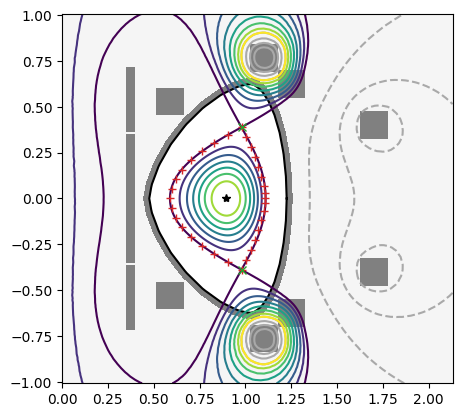

In [20]:
fig, ax = plt.subplots(1,1)
mygs.plot_machine(fig,ax)
mygs.plot_psi(fig,ax,xpoint_color=None,vacuum_nlevels=4)
mygs.plot_constraints(fig,ax)
mygs.print_info()

0.0006704942464907595


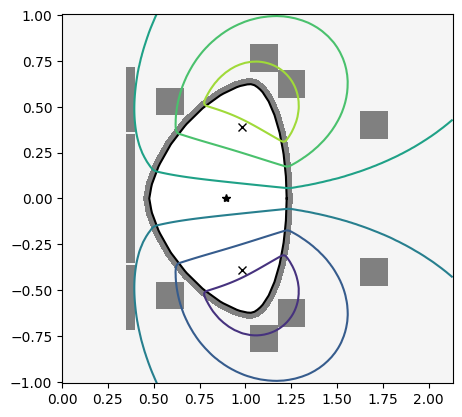

In [21]:
eig_vals, eig_vecs = mygs.eig_td(-1.E5,10, include_bounds = True)
eig_wall, eigvec_wall = mygs.eig_wall()
fig, ax = plt.subplots()
mygs.plot_machine(fig,ax)
mygs.plot_psi(fig,ax,psi = eigvec_wall[1,:], normalized = False)
print(1/eig_wall[1,0])


In [22]:
print(-eig_vals[0,0]/eig_vals[1,0])

3.1924198920980933


#----------------------------------------------
OpenFUSIONToolkit Initialized
Development branch:   main
Revision id:          11ca7a7
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  4.294E+00
    # of points  =    3455
    # of edges   =   10254
    # of cells   =    6800
    # of boundary points =     108
    # of boundary edges  =     108
    # of boundary cells  =     108
  Resolution statistics:
    hmin =  1.000E-02
    hrms =  4.041E-02
    hmax =  1.180

Saving EQDSK file
 "none"
Flux surfaces from 600x600 gEQDSK
Levels based on psi ...
Grid diagonal resolution: 0.00228573744344538 [m]
Cropping tables ...
Find magnetic axis ...
Find separatrix ...
Tracing flux surfaces ...
  > Took 0:00:01.769096
Find Br, Bz, F on flux surfaces ...
  > Took 0:00:01.163457
Flux surface averaging ...
  > Took 0:00:01.495476
Geometric quantities ...
  > Took 0:00:03.440342
[ 0.92687822 -0.38731303]
[0.92688792 0.38733047]
bye
#----------------------------------------------
OpenFUSIONToolkit Initialized
Development branch:   main
Revision id:          11ca7a7
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend      

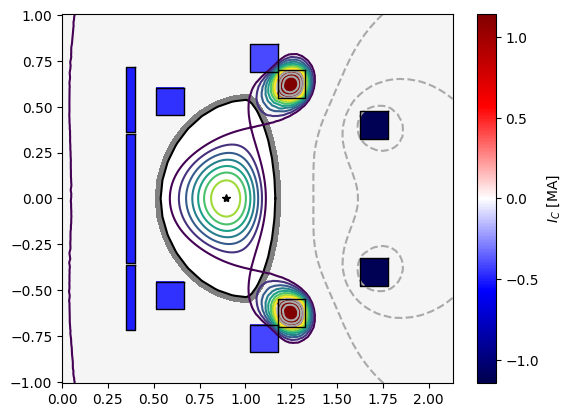

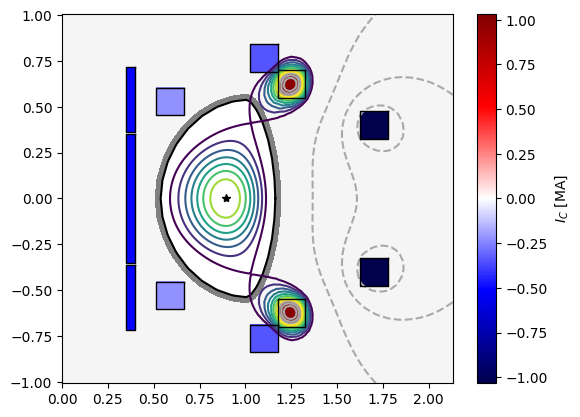

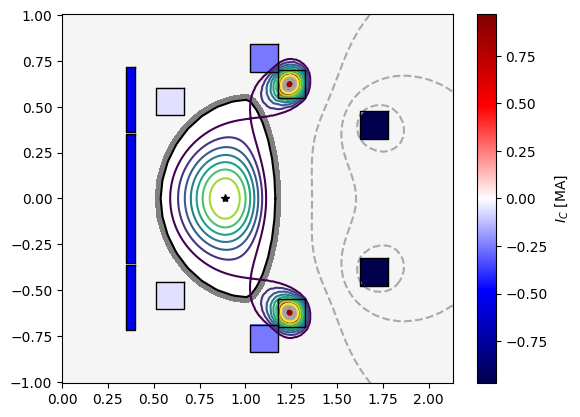

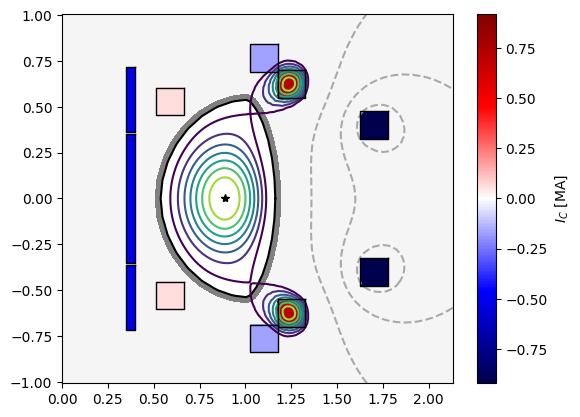

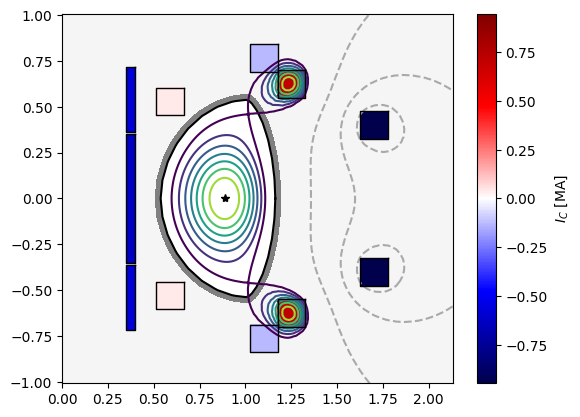

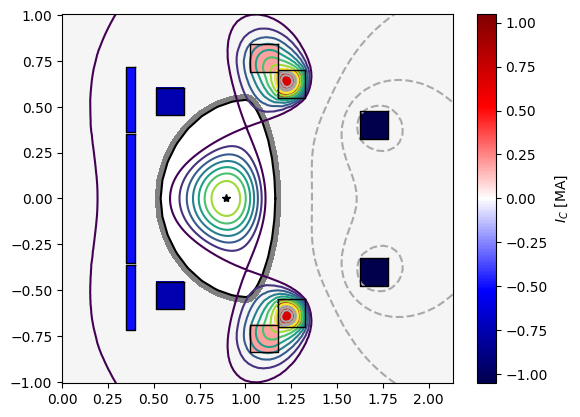

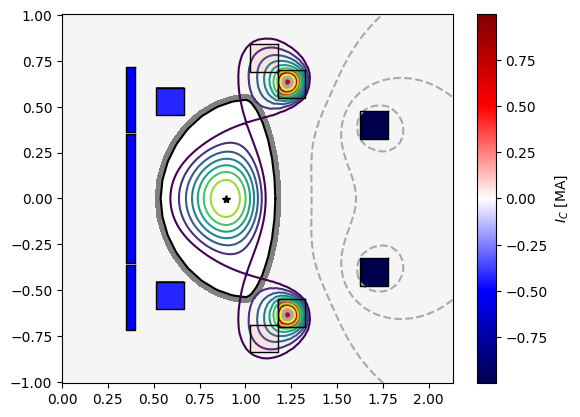

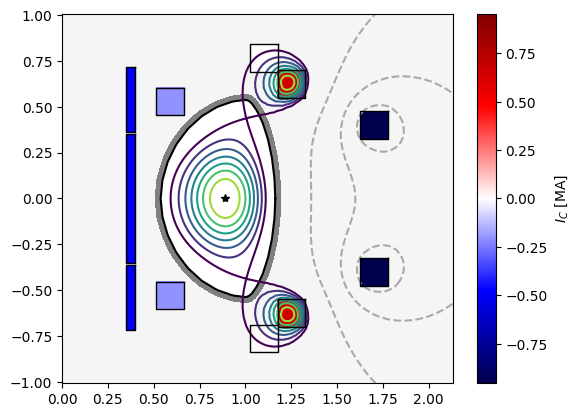

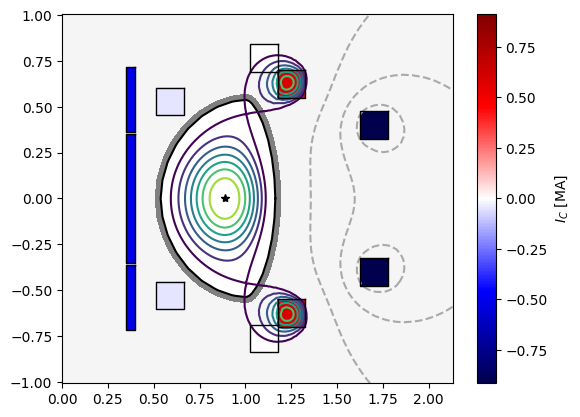

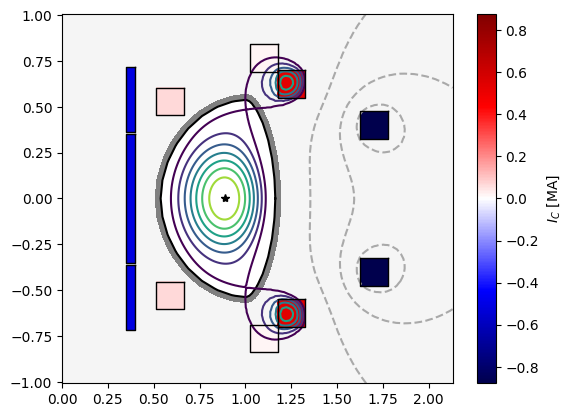

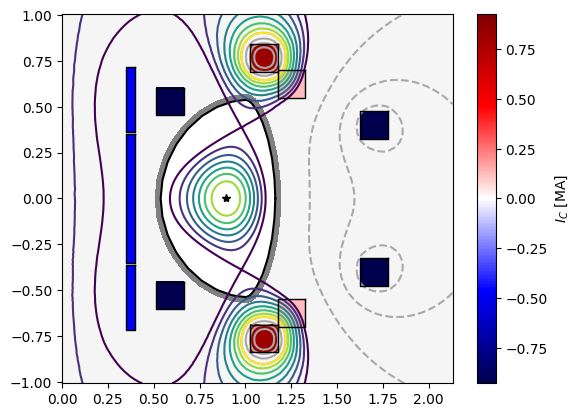

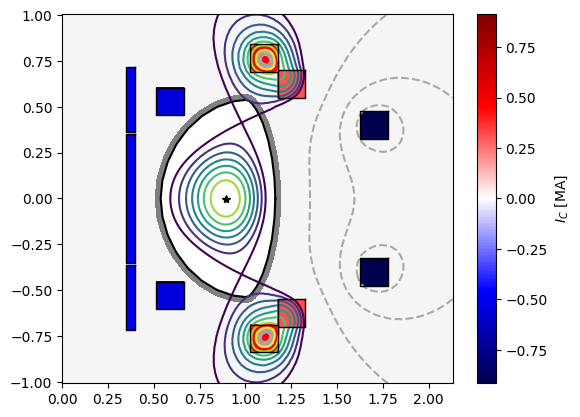

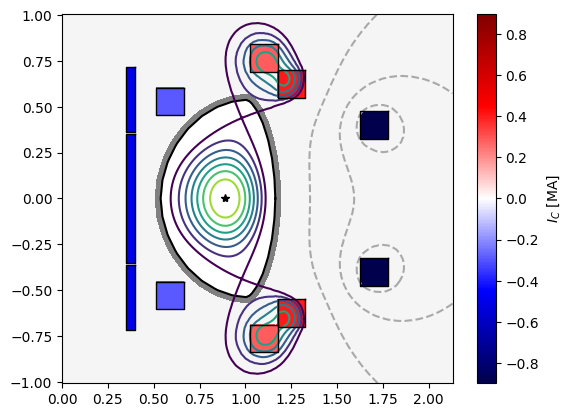

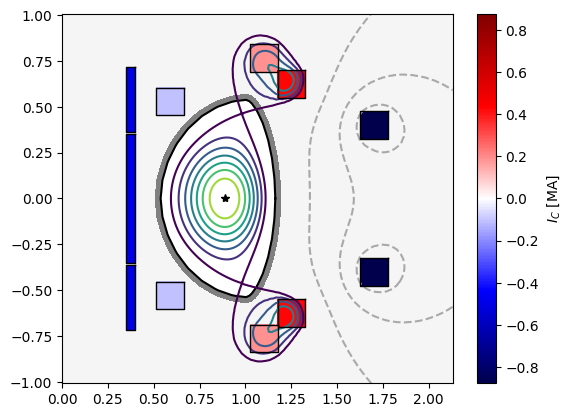

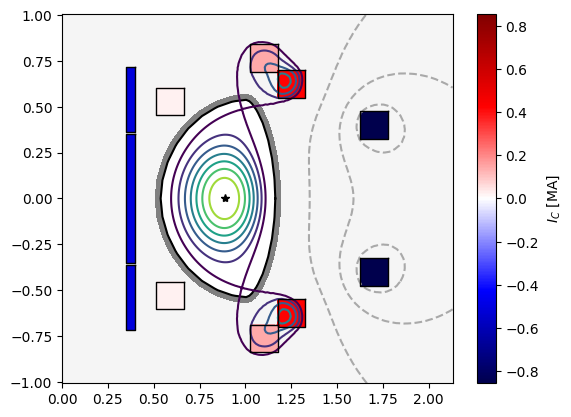

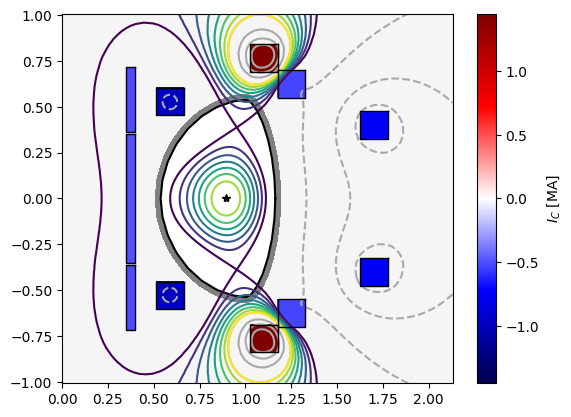

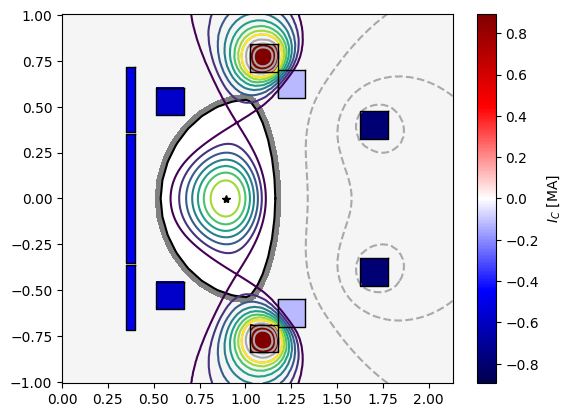

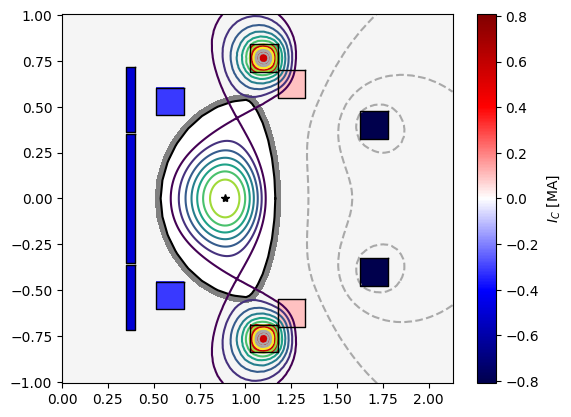

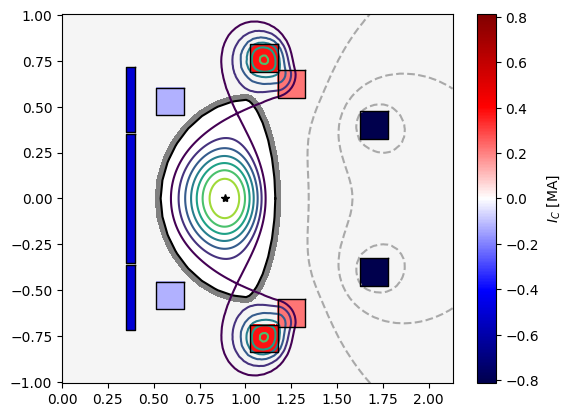

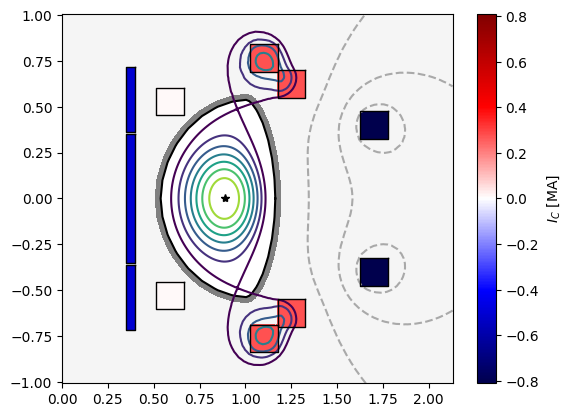

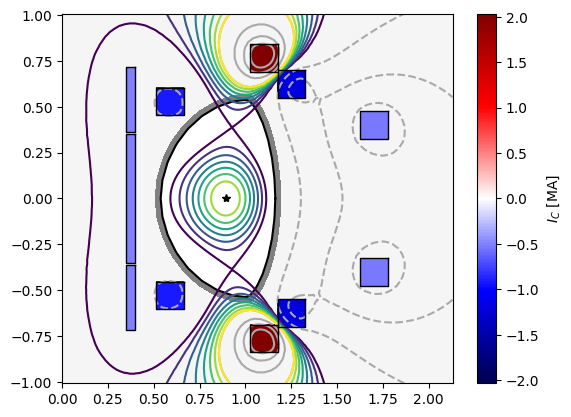

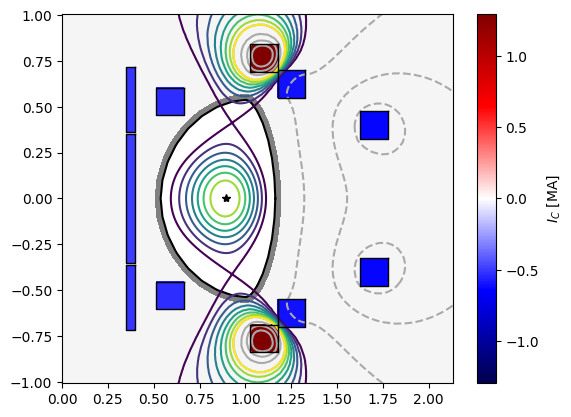

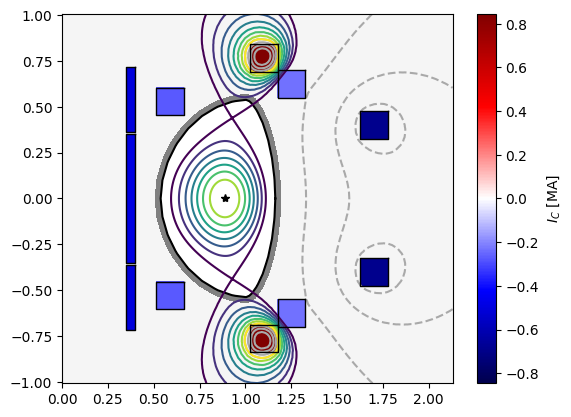

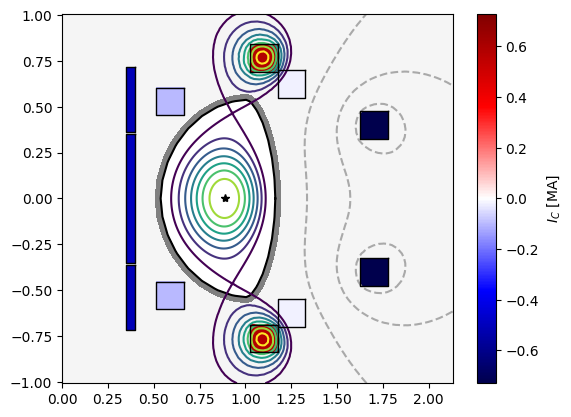

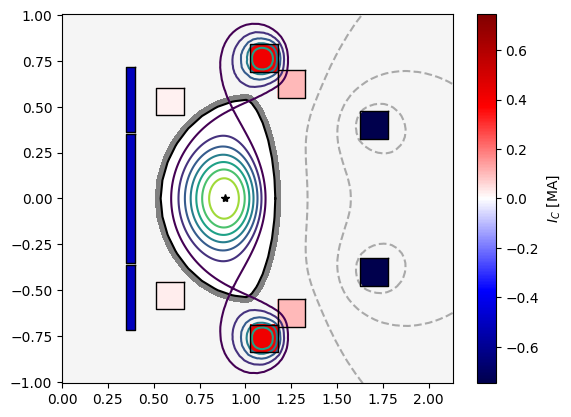

In [15]:
import copy
from omfit_classes.omfit_eqdsk import OMFITgeqdsk
d_omfit = []
e_omfit = []
d_tok = []
e_tok = []
q95 = []
betap = []
li = []
coil_currents = []
ds = np.linspace(-0.7, -.3, 5)
es = np.linspace(1.5, 1.9, 5)
dist = []
gammas = []
taus = []
eqdsks = []
lcfs = []

for d in ds: 
    for e in es:
        mygs = TokaMaker()
        mygs.setup_mesh(mesh_pts, mesh_lc, mesh_reg)
        mygs.setup_regions(cond_dict=cond_dict)
        mygs.setup(order = 2, F0 =0.8*3) ## F0 = B0 * R0

        coil_reg_mat = np.zeros((mygs.ncoils+1,mygs.ncoils+1), dtype=np.float64)
        targets = np.zeros(mygs.ncoils+1)
        coil_weights = 0.5*np.ones(mygs.ncoils+1)

        #Set target values for CS coils
        coil_reg_mat[0,0] = 1
        coil_reg_mat[1,1] = 1
        coil_reg_mat[2,2] = 1
        targets[0] = -5E5
        targets[1] = -5E5 
        targets[2] = -5E5

        #Enforce up/down symmetry in PF coils
        coil_reg_mat[3,3] = 1
        coil_reg_mat[3,7] = -1
        coil_reg_mat[4,4] = 1
        coil_reg_mat[4,8] = -1
        coil_reg_mat[5,5] = 1
        coil_reg_mat[5,9] = -1
        coil_reg_mat[6,6] = 1
        coil_reg_mat[6,10] = -1
        mygs.set_coil_reg(coil_reg_mat, targets, coil_weights)

        #Set upper bound on coil currents
        coil_bounds = np.zeros((mygs.ncoils+1,2), dtype=np.float64)
        coil_bounds[:,0] = -1.E11; coil_bounds[:,1] = 1.E11
        mygs.set_coil_bounds(coil_bounds)

        # Define shape of P' anf FF' profiles
        n_sample = 40
        psi_sample = np.linspace(0.0,1.0,n_sample)
        # Set F*F' profile
        alpha = 2
        gamma = 3
        ffp_prof = {
            'type': 'linterp',
            'x': psi_sample,
            'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
        }
        ffp_prof['y'] /= ffp_prof['y'][0] # Normalize profile (not required but convienient)
        # Set P' profile
        alpha = 2
        gamma = 3
        pp_prof = {
            'type': 'linterp',
            'x': psi_sample,
            'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
        }
        pp_prof['y'] /= pp_prof['y'][0] # Normalize profile (not required but convienient)

        mygs.set_profiles(ffp_prof=ffp_prof,pp_prof=pp_prof)

        # set global targets
        Ip_target = 1E6
        mygs.set_targets(Ip = Ip_target, Ip_ratio=1.0)

        # set boundary/saddle point targets
        r, z, zeff = boundaryShape(kapu = e, kapl = e, delu = d, dell = d, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588, eps = 0.2588/0.85, zoffset = 0, upnull = True, lonull = True, npts = 8)
        boundary = np.column_stack((r,z))
        x_points = np.zeros((2,2))
        x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
        x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]
        x_weights = 5*np.ones(2)
        mygs.set_saddles(x_points, x_weights)
        isoflux_weights = 10*np.ones(32)

        if d < -0.65 and e > 1.85:
            isoflux_weights = 30*np.ones(32)
            print('catch')
        
        mygs.set_isoflux(boundary, isoflux_weights)

        #find equilibrium
        mygs.init_psi(0.68,0,0.2, 1.8,0.3)
        mygs.settings.maxits = 100
        mygs.update_settings()
        mygs.solve()

        #plot equilibrium
        fig, ax = plt.subplots(1,1)
        mygs.plot_machine(fig,ax,coil_colormap='seismic',coil_symmap=True,coil_scale=1.E-6,coil_clabel=r'$I_C$ [MA]')
        mygs.plot_psi(fig,ax,xpoint_color=None,vacuum_nlevels=4)
        
        for key, coil in coils.items():
            plt.plot(corners(coil['rc'],coil['zc'],coil['w'],coil['h'])[:,0],corners(coil['rc'],coil['zc'],coil['w'],coil['h'])[:,1], color = 'k', linewidth = 1)

        #save as eqdsk
        mygs.save_eqdsk('temp', lcfs_pad = .001, nr = 600, nz = 600)

        eqdsk = OMFITgeqdsk('temp')
        d_omfit.append(eqdsk['fluxSurfaces']['geo']['delta'][-1])    
        e_omfit.append(eqdsk['fluxSurfaces']['geo']['kap'][-1])
        
        point, distance = closest(read_eqdsk('temp')['rzout'], vv3)
        dist.append(distance)

        lcfs.append(read_eqdsk('temp')['rzout'])
        stats = mygs.get_stats()
        q95.append(stats['q_95'])
        betap.append(stats['beta_pol'])
        li.append(stats['l_i'])
        d_tok.append(stats['delta'])
        e_tok.append(stats['kappa'])

        eig_vals, eig_vecs = mygs.eig_td(-1.E5,10, include_bounds = True)
        gammas.append(eig_vals[0,0])

        eig_wall, eigvec_wall = mygs.eig_wall()
        taus.append(1/eig_wall[1][0])

        #extract coil currents
        current,currentmap = mygs.get_coil_currents()
        coil_currents.append(current)
        

        mygs.reset()

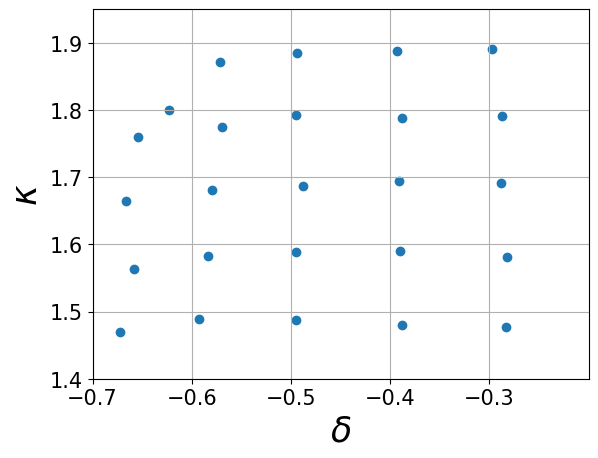

In [14]:
#OMFIT geometry calcs
plt.scatter(d_omfit, e_omfit)
plt.xlabel(r'$\delta$', size = 25)
plt.ylabel(r'$\kappa$', size = 25)
plt.xlim([-0.7, -0.2])
plt.ylim([1.4, 1.95])
plt.xticks(np.linspace(-0.7, -0.3, 5),size = 15)
plt.yticks(size = 15)
plt.grid()

In [24]:
print(dist)

[10.09929086513153, 9.453449928890032, 8.12949906681659, 6.130479152163432, 6.947356945819025, 10.659601602624443, 10.084849644328324, 9.188072663021572, 7.873457892997957, 5.787656054612711, 10.821081357737787, 10.218760253854024, 9.591623706942993, 8.485151844078949, 6.619521688873364, 10.87557282189768, 10.311713129650155, 9.600253515405482, 8.521941843203901, 6.746707072581898, 10.729006285736572, 10.268053936535662, 9.417830673025266, 8.23863145688938, 6.271452741166911]


In [25]:
gamma = np.array(gammas)
tau = np.array(taus)

In [26]:
print(gamma*tau*-1)
print(gamma)
print(tau)

[2.30223351 3.24344022 4.55571897 6.13596323 9.10521368 2.12972321
 2.96797951 4.1404573  5.64373905 7.73073782 1.8044006  2.56945597
 3.65899897 5.11218429 7.02671014 1.57787848 2.2896803  3.23437503
 4.45738853 6.07640512 1.25394765 1.96990016 2.90415293 3.9972231
 5.43403899]
[ -285.10182772  -401.65809903  -564.16684134  -759.85964321
 -1127.56288803  -263.73865934  -367.5458549   -512.74205705
  -698.90404774  -957.35183872  -223.4516648   -318.19387131
  -453.11967272  -633.07786953  -870.16712156  -195.39983167
  -283.54727585  -400.5354929   -551.98988812  -752.48414227
  -155.28518908  -243.94664336  -359.64175879  -495.00435438
  -672.9354091 ]
[0.00807513 0.00807513 0.00807513 0.00807513 0.00807513 0.00807513
 0.00807513 0.00807513 0.00807513 0.00807513 0.00807513 0.00807513
 0.00807513 0.00807513 0.00807513 0.00807513 0.00807513 0.00807513
 0.00807513 0.00807513 0.00807513 0.00807513 0.00807513 0.00807513
 0.00807513]


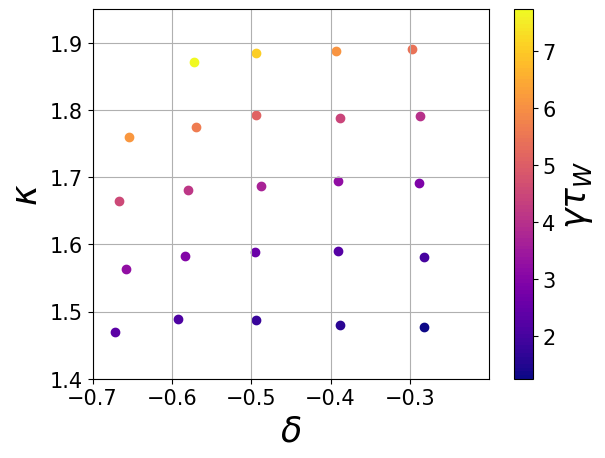

In [28]:
gt = np.array(gamma*tau*-1)
norm = plt.Normalize(np.min(gt), 7.73073782)
cmap = mpl.cm.plasma(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:,:-1])
c = cmap(norm(gt))

for i in range(25):
    if i is not 4:
        plt.scatter(d_omfit[i], e_omfit[i], color = c[i])
plt.xlabel(r'$\delta$', size = 25)
plt.ylabel(r'$\kappa$', size = 25)
plt.xlim([-0.7, -0.2])
plt.ylim([1.4, 1.95])
plt.xticks(np.linspace(-0.7, -0.3, 5),size = 15)
plt.yticks(size = 15)
plt.grid()
sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
cb = plt.colorbar(sm)
cb.set_label(label=r'$\gamma \tau_{W}$', size = 25)
cb.ax.tick_params(labelsize=15)

(array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

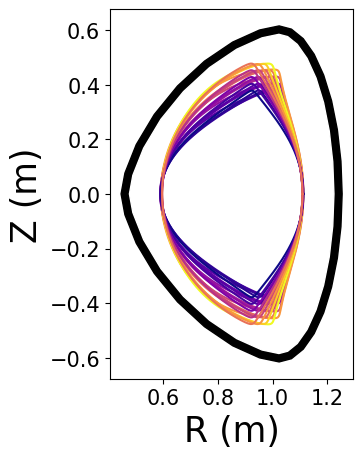

In [29]:
fig, ax = plt.subplots()
plt.fill(vv_outer[:,0], vv_outer[:,1], color = 'k')
plt.fill(vv_inner[:,0], vv_inner[:,1], color = 'w')
for i in range(25):
    if i is not 4:
        plt.plot(lcfs[i][:,0], lcfs[i][:,1], color = c[i])

plt.gca().set_aspect(aspect = 1)

plt.xlabel(r'R (m)', size = 25)
plt.ylabel(r'Z (m)', size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)



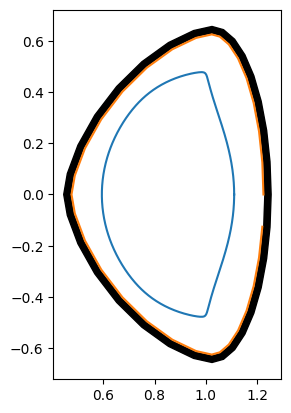

In [41]:
plt.fill(vv_outer[:,0], vv_outer[:,1], color = 'k')
plt.fill(vv_inner[:,0], vv_inner[:,1], color = 'w')
plt.plot(lcfs[9][:,0], lcfs[9][:,1])
plt.gca().set_aspect(aspect = 1)
r, z, zeff = boundaryShape(kapu = 1.9, kapl = 1.9, delu = -0.4, dell = -0.4, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588, eps = 0.2588/0.85, zoffset = 0, upnull = True, lonull = True, npts = 8)
#plt.plot(r,z)
plt.plot(vv_inner[:,0], vv_inner[:,1])


[ 0.58817178 -0.00159887]
[1.11205718e+00 2.77576310e-07]
[1.11268431e+00 2.20212768e-05]
[ 1.11302479e+00 -1.30841265e-05]
[ 1.10790041e+00 -4.08556221e-05]
[ 0.58916904 -0.00159584]
[1.11011454e+00 9.90473136e-06]
[1.11046644e+00 2.06847842e-05]
[ 1.11065945e+00 -6.38112665e-06]
[0.72391253 0.34449303]
[ 0.58874487 -0.00160874]
[1.10992305e+00 1.85620137e-05]
[1.10996686e+00 4.29855656e-06]
[ 1.10984826e+00 -1.80118489e-05]
[ 1.10971866e+00 -1.86960111e-06]
[1.11158310e+00 1.55488303e-05]
[1.11103047e+00 8.49240256e-06]
[1.11042750e+00 4.43163697e-06]
[ 1.10992997e+00 -2.86898744e-05]
[1.10950775e+00 2.94042224e-05]
[ 1.11320405e+00 -4.55624962e-06]
[1.11218805e+00 5.25715964e-06]
[ 1.11120766e+00 -1.82625314e-05]
[ 1.11031689e+00 -1.07012131e-05]
[0.87047615 0.45524187]


([<matplotlib.axis.YTick at 0x130176340>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

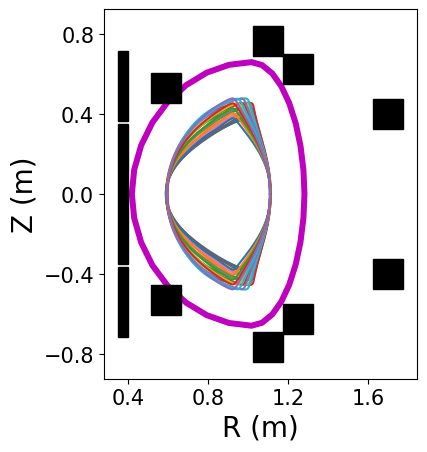

In [127]:
r,z,zeff= boundaryShape(kapu = 1.55, kapl = 1.55, delu = -0.4, dell = -0.4, zetail = -.03, zetaiu = -.03, zetaou = -.03, zetaol = -.03, a = 0.413, eps = 0.413/0.85, zoffset = 0, upnull = False, lonull = False, npts = 8)
lim1 = np.column_stack((r,z))
vv1 = resize_polygon(lim1, 0.03)

lim2 = resize_polygon(lim1, -0.05)
vv2 = resize_polygon(lim2, 0.03)

lim3 = resize_polygon(lim1, -0.1)
vv3 = resize_polygon(lim3, 0.03)

plt.fill(vv1[:,0], vv1[:,1], color = 'm')
plt.fill(lim1[:,0], lim1[:,1], color = 'w')
dist = []
for l in lcfs:
    point, distance = closest(l,lim3)
    dist.append(distance)
    #plt.scatter(point[0], point[1])
    print(point)
    plt.plot(l[:,0], l[:,1])


plt.gca().set_aspect(aspect = 1)

for key, coil in coils.items():
    plt.fill(corners(coil['rc'],coil['zc'],coil['w'],coil['h'])[:,0],corners(coil['rc'],coil['zc'],coil['w'],coil['h'])[:,1], color = 'k')

plt.xlabel(r'R (m)', size = 20)
plt.ylabel(r'Z (m)', size = 20)
plt.xticks(np.linspace(0.4, 1.6, 4),size = 15)
plt.yticks(np.linspace(-0.8, 0.8, 5),size = 15)

[5.072052622752913, 5.085513711904436, 5.022801194563968, 4.988752883409007, 5.501192228938083, 5.171721063071735, 5.279777804733826, 5.2445881197351945, 5.2252867507918905, 5.17598646268617, 5.129364008892966, 5.298927036940143, 5.294545729278324, 5.306406017522146, 5.319365715114244, 5.132921947334049, 5.188184781333638, 5.248481730538308, 5.298235488605177, 5.3404575213177345, 4.970826732709936, 5.0724267390717825, 5.1704660343528674, 5.259542820693631, 5.078966697991089]


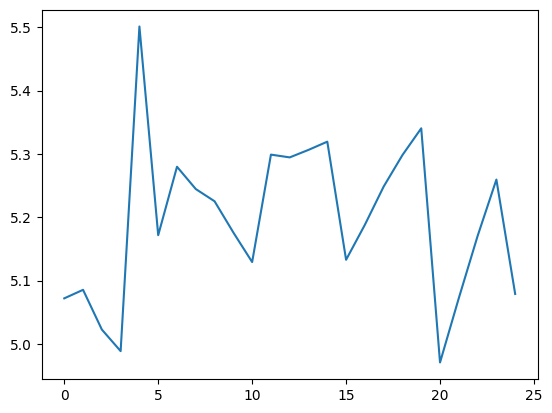

In [115]:
plt.plot(dist)
print(dist)

In [54]:
import h5py
filename = "omas_diii-d.h5"

with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    data = list(f[a_group_key])
    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object

    print(f.keys())
    

Keys: <KeysViewHDF5 ['dataset_description', 'magnetics', 'pf_active', 'pf_passive']>
<class 'h5py._hl.group.Group'>
<KeysViewHDF5 ['dataset_description', 'magnetics', 'pf_active', 'pf_passive']>


In [55]:
print(d_omfit)

[-0.6846712179103985, -0.6657351746981856, -0.665524533663503, -0.6398283908898409, -0.619929110301556, -0.5927448455749849, -0.5869053637022611, -0.5892075451412834, -0.5812450194391339, -0.5673563105550978, -0.494794986988354, -0.4905994813515718, -0.48848261274276794, -0.4896413935879792, -0.4935913283992425, -0.3897632442492681, -0.3865655234708226, -0.3892562474587575, -0.39376318448182, -0.3958423259826183, -0.2829560878979219, -0.2844311247127049, -0.285129607630895, -0.288845948403463, -0.2996146948410431]


In [56]:
print(e_omfit)

[1.475898959506572, 1.5662172884698216, 1.6635850141619364, 1.7570268759499175, 1.7989071111012884, 1.4860186696439832, 1.5844088551505997, 1.6859157716655986, 1.7782810764254269, 1.870555815532838, 1.4866504358531103, 1.5870895607378028, 1.6879464202375167, 1.7879895721307, 1.886380201172849, 1.4836114116522403, 1.5847945528101097, 1.688578277271109, 1.7924795696595706, 1.892325961198365, 1.4765761023892903, 1.5866991193511295, 1.6911178406734997, 1.7945148247018867, 1.8956375781007277]


In [ ]:
gt = np.array(gamma*tau*-1)
norm = plt.Normalize(np.min(gt), 7.73073782)
cmap = mpl.cm.plasma(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:,:-1])
c = cmap(norm(gt))

for i in range(25):
    if i is not 4:
        plt.scatter(d_omfit[i], e_omfit[i], color = [])
plt.xlabel(r'$\delta$', size = 25)
plt.ylabel(r'$\kappa$', size = 25)
plt.xlim([-0.7, -0.2])
plt.ylim([1.4, 1.95])
plt.xticks(np.linspace(-0.7, -0.3, 5),size = 15)
plt.yticks(size = 15)
plt.grid()
sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
cb = plt.colorbar(sm)
cb.set_label(label=r'$\gamma \tau_{W}$', size = 25)
cb.ax.tick_params(labelsize=15)